In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

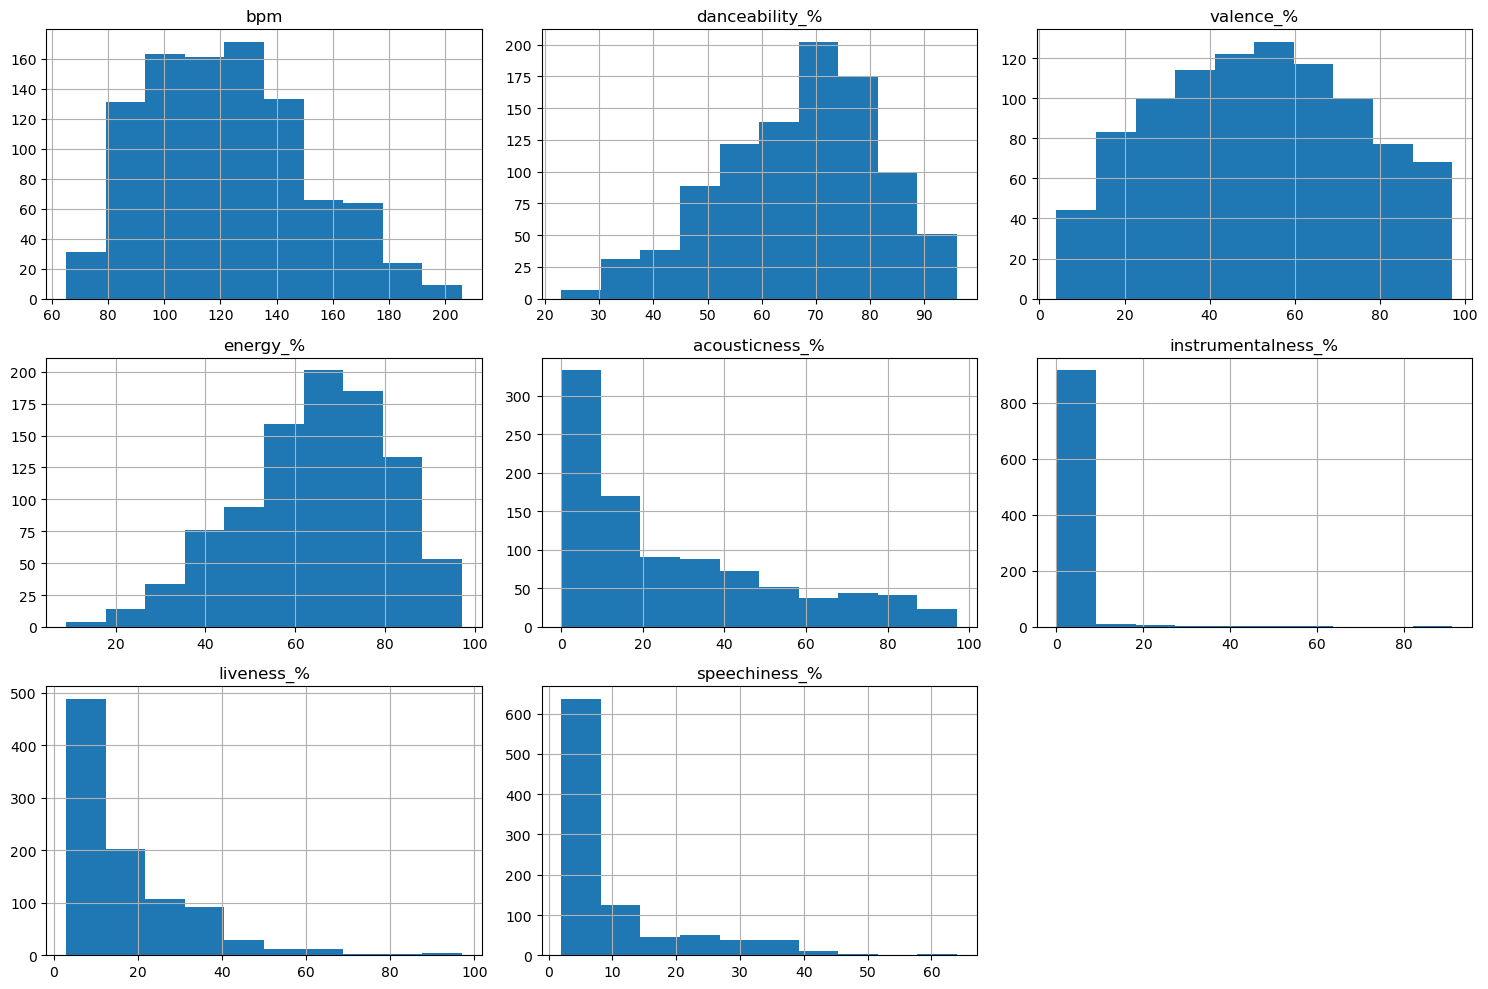

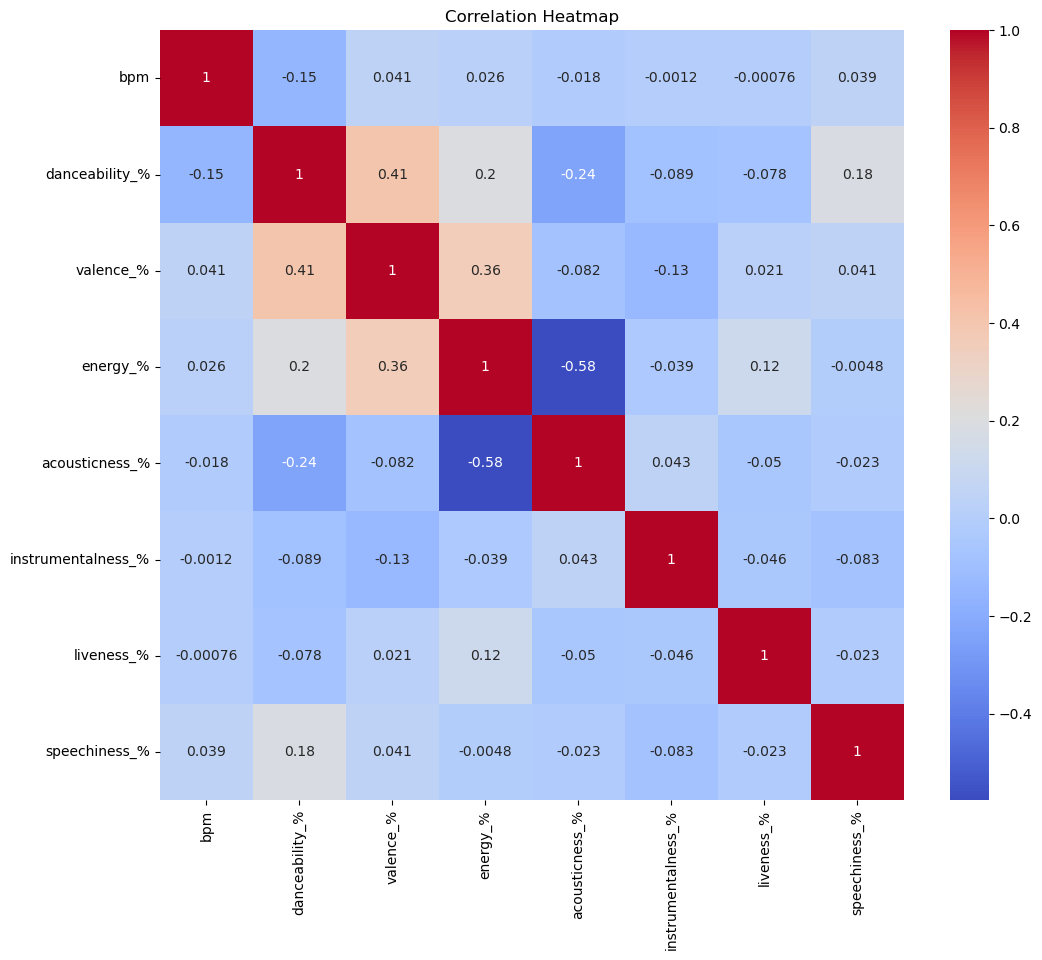

In [2]:
# Load the dataset
file_path = 'spotify-2023.csv'
dataset = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display basic information about the dataset
print(dataset.info())

# Display summary statistics
print(dataset.describe())

# Visualize the distribution of numerical features
numerical_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
dataset[numerical_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(dataset[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [3]:
# Remove columns with any missing values
data_no_missing = dataset.dropna(axis=1)

In [5]:
# EDA
dataset['streams'] = pd.to_numeric(dataset['streams'], errors='coerce')
dataset[dataset['streams'].isna()==True]
dataset['streams'].fillna(dataset.streams.median(), inplace=True)
print(dataset.describe())

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            953.000000         953.000000  9.530000e+02   
mean            5200.124869          12.009444  5.139028e+08   
std             7897.608990          19.575992  5.666055e+08   
min               31.000000           0.000000  2.762000e+03   
25%              875.000000           0.000000  1.417210e+08   
50%

In [6]:
# Check streams 
dataset['streams']

0      141381703.0
1      133716286.0
2      140003974.0
3      800840817.0
4      303236322.0
          ...     
948     91473363.0
949    121871870.0
950     73513683.0
951    133895612.0
952     96007391.0
Name: streams, Length: 953, dtype: float64

In [7]:
# Perform linear regression using tempo, energy, and danceability
X = dataset[['bpm', 'energy_%', 'danceability_%']]
y = dataset['streams']

# Convert 'streams' to numeric, replacing any non-numeric values with NaN
y = pd.to_numeric(y, errors='coerce')

In [8]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set LinearRegression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict o/p using X_test
y_pred = model.predict(X_test)

print("Linear Regression Results:")
print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

Linear Regression Results:
R-squared: -0.05070759790004287
Mean Squared Error: 2.3546996532629062e+17
Coefficients:
bpm: -47555.41752459585
energy_%: 103578.03490664996
danceability_%: -4225066.35698594



Correlation between energy and danceability: 0.19809484837625713


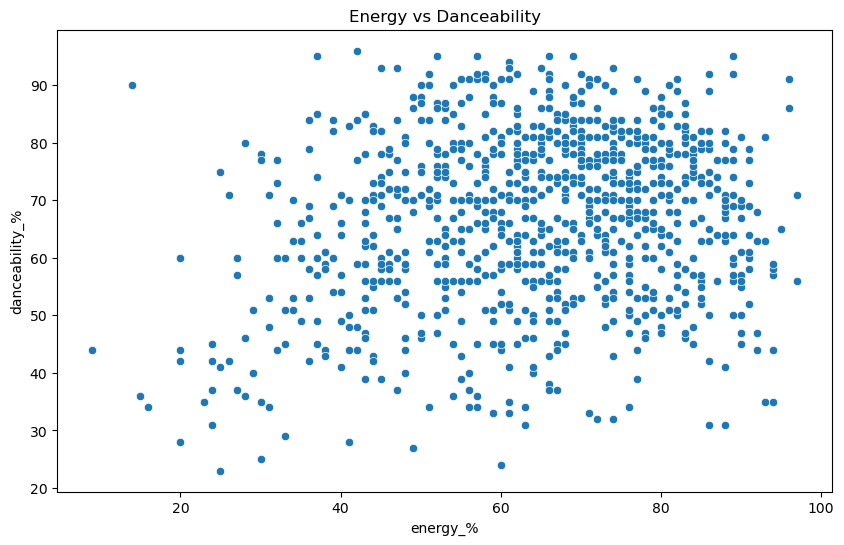

In [9]:
# Perform correlation analysis between energy and danceability
correlation = dataset['energy_%'].corr(dataset['danceability_%'])
print(f"\nCorrelation between energy and danceability: {correlation}")

# Visualize the relationship between energy and danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy_%', y='danceability_%', data=dataset)
plt.title('Energy vs Danceability')
plt.show()

In [13]:
# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model's performance
r_squared_ridge = r2_score(y_test, y_pred_ridge)
mean_squared_err_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"R-squared (Ridge): {r_squared_ridge}")
print(f"Mean Squared Error (Ridge): {mean_squared_err_ridge}")

R-squared (Ridge): -0.05070757196782516
Mean Squared Error (Ridge): 2.3546995951472285e+17


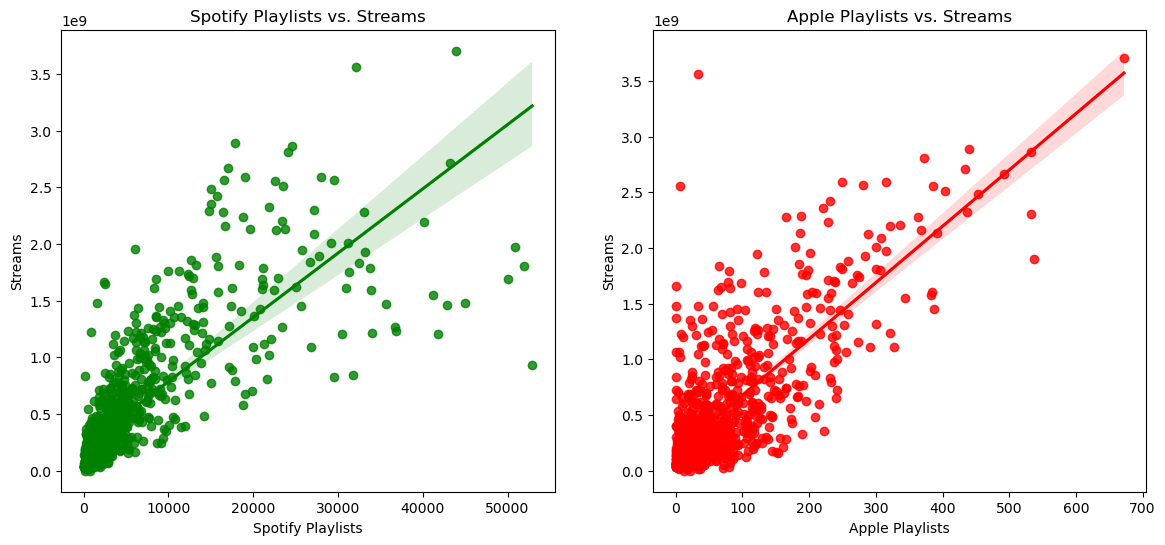

In [14]:
# Relationship btw the number of playlists the song is in and streams
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x = dataset['in_spotify_playlists'], y = dataset['streams'], color='green')
plt.title('Spotify Playlists vs. Streams')
plt.xlabel('Spotify Playlists')
plt.ylabel('Streams')

plt.subplot(1, 2, 2)
sns.regplot(x = dataset['in_apple_playlists'], y = dataset['streams'], color='red')
plt.title('Apple Playlists vs. Streams')
plt.xlabel('Apple Playlists')
plt.ylabel('Streams')
plt.show()

In [15]:
# Linear Regression Model to Predict Streams

my_features = ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists']
target = ['streams']

X = dataset[my_features]
y = dataset[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_predicted = lr.predict(X_test)
print('Model Accuracy: ', round(r2_score(y_test, y_predicted), 3) * 100, '%')

Model Accuracy:  70.5 %


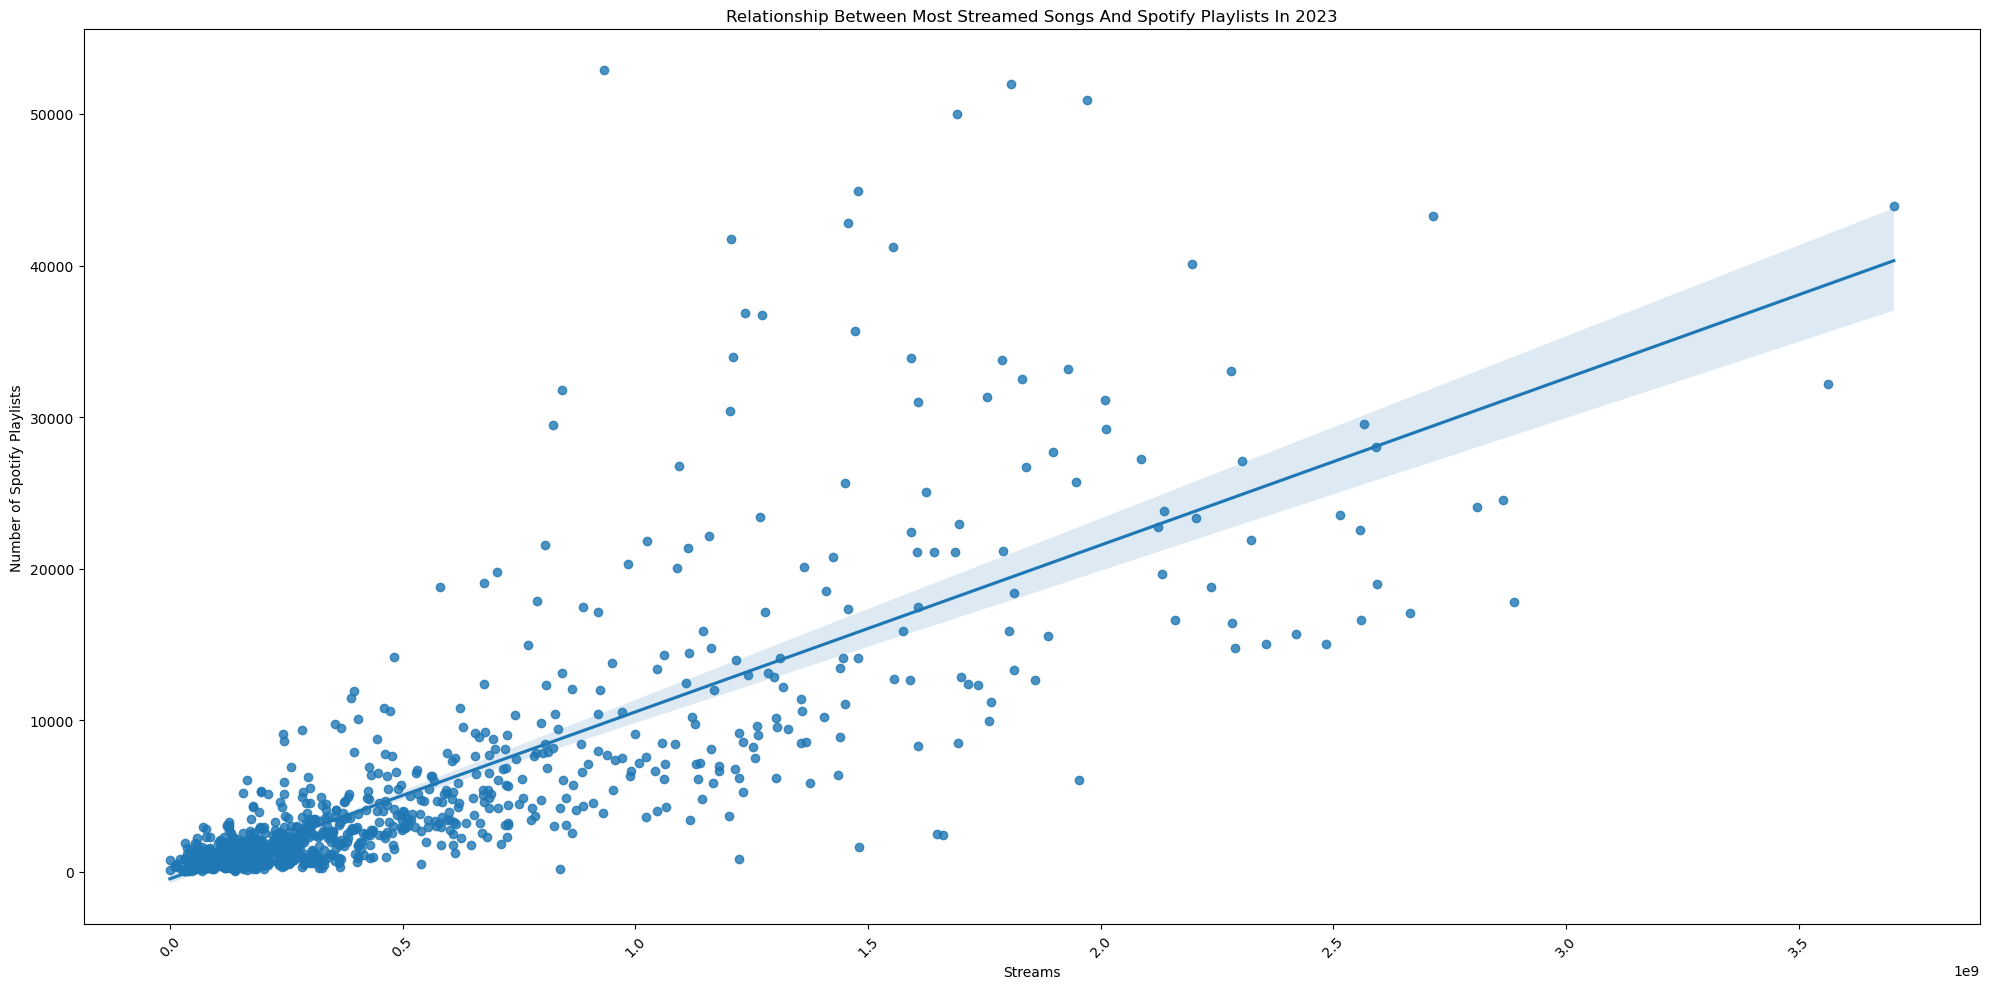

In [16]:
#scatter plot with regression line represents Relationship Between Most Streamed Songs And Spotify Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_spotify_playlists', data = dataset, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Spotify Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Spotify Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

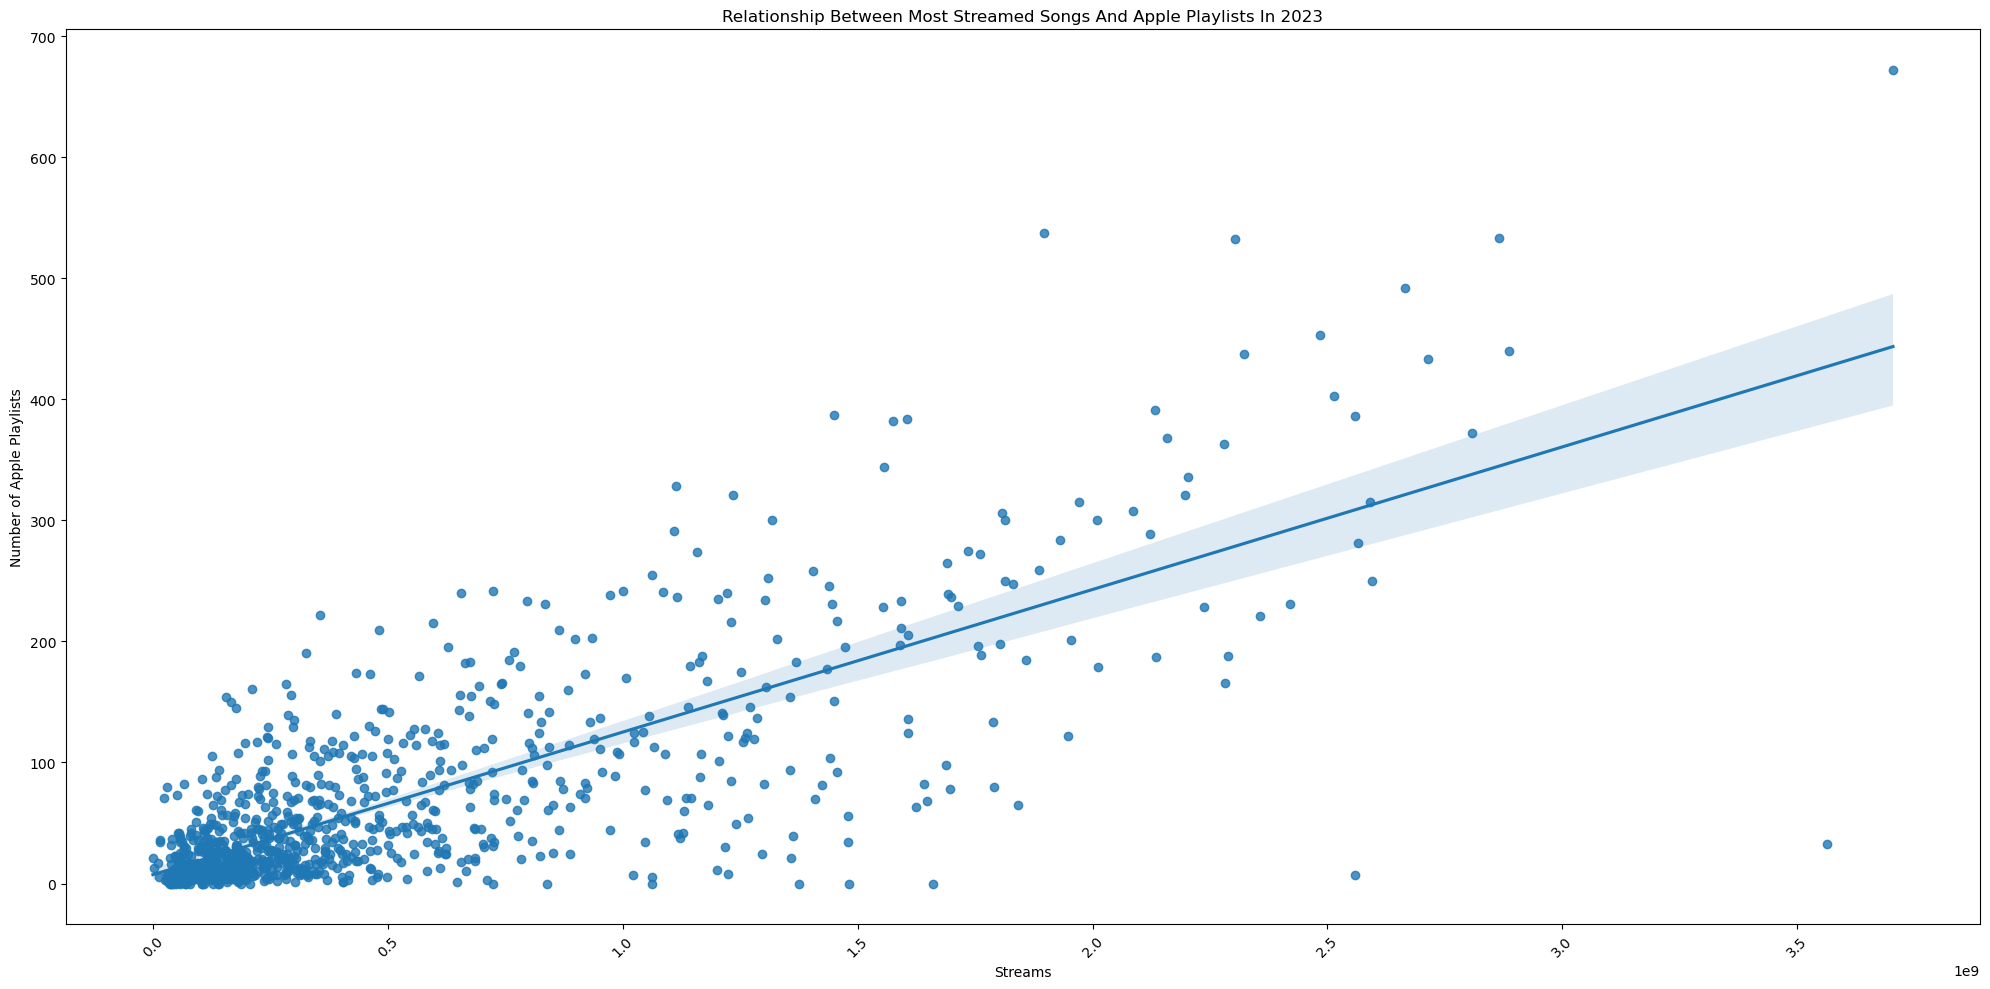

In [17]:
#scatter plot with regression line represents Relationship Between Most Streamed Songs And Apple Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_apple_playlists', data = dataset, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Apple Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Apple Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

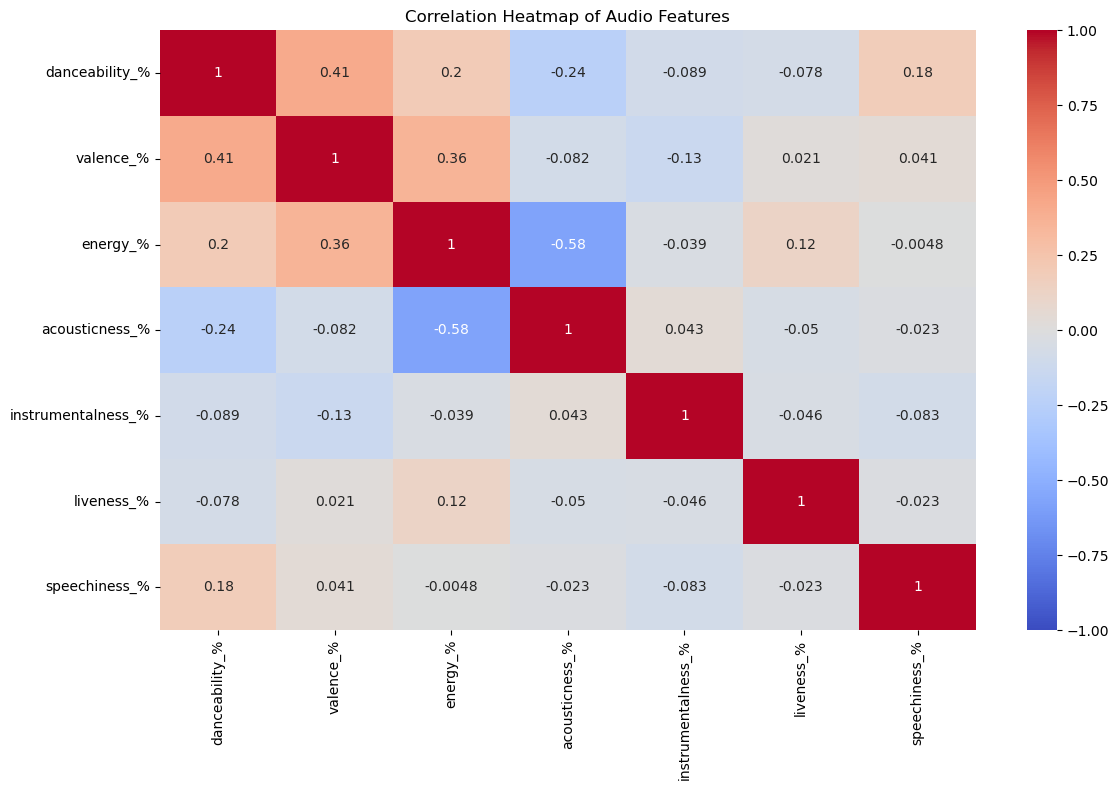

In [18]:
# Relationship Between All Audio Features
plt.figure(figsize = (12, 8))
corr = dataset[['danceability_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin =- 1, vmax = 1)
plt.title('Correlation Heatmap of Audio Features')
plt.tight_layout()
plt.show()